<a href="https://colab.research.google.com/github/diyajojo/ds-ml-basics/blob/main/airbnb_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

missing

In [2]:
import pandas as pd
data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
missing_data=data.isnull().sum()
print(missing_data)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
drop_items=['id','host_name','reviews_per_month','last_review']
data.drop(drop_items,axis=1,inplace=True,errors='ignore')

In [6]:
rows_todrop=data.dropna(subset=['name'])


<Axes: xlabel='price'>

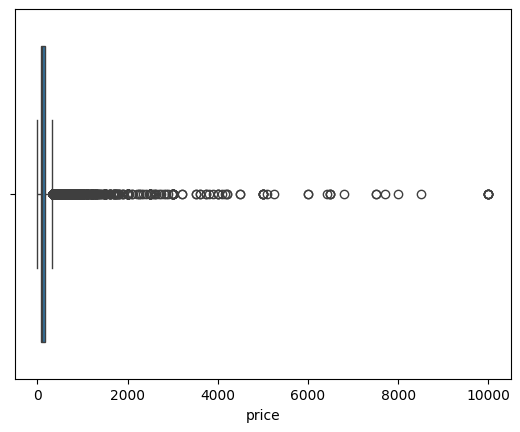

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='price',data=data)

In [8]:
Q1=data['price'].quantile(0.25)
Q3=data['price'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

106.0


In [9]:
cleaned_data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]

<Axes: xlabel='price'>

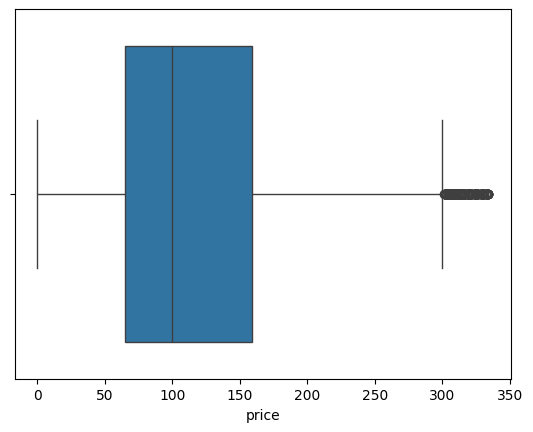

In [10]:
sns.boxplot(x='price',data=cleaned_data)

In [11]:
lowerbound=0
upperbound=1000
capped_data=data['price'] = data['price'].apply(lambda x:
    lowerbound if x < lowerbound
    else upperbound if x > upperbound
    else x
)

<Axes: xlabel='price'>

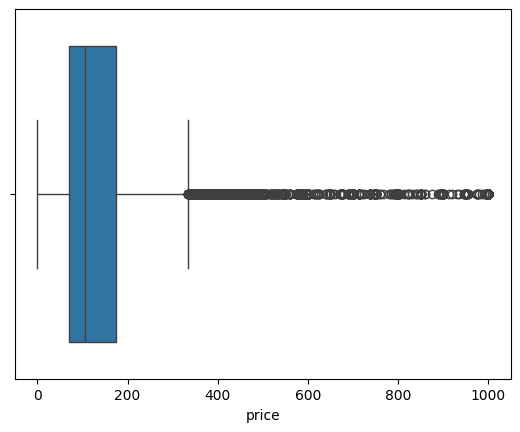

In [14]:
data_new=data.copy()
data_new['price']=data['price']
sns.boxplot(x='price',data=data_new)

<Axes: xlabel='price'>

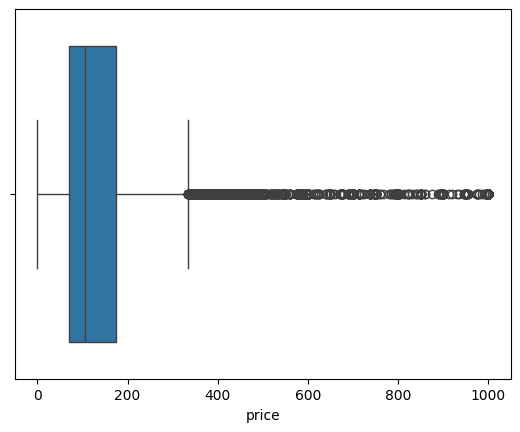

In [16]:
data=data_new.copy()
sns.boxplot(x='price',data=data)

<Axes: xlabel='price'>

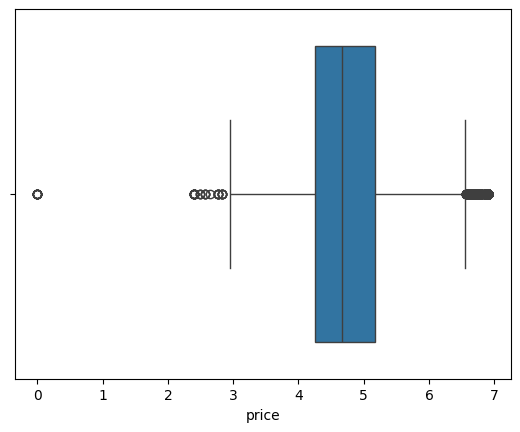

In [17]:
import numpy as np
data['price']=np.log(data['price']+1)
sns.boxplot(x='price',data=data)

In [20]:
encoded_data=pd.get_dummies(data,columns=['room_type'])
encoded_data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,5.010635,1,9,6,365,False,True,False
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,5.420535,1,45,2,355,True,False,False
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,5.017280,3,0,1,365,False,True,False
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,4.499810,1,270,1,194,True,False,False
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,4.394449,10,9,1,0,True,False,False
